# Basic Plotting in Python
Jeffrey Hallock  

## Overview

This document is a Python translation of an R script written for Project 1 of the
Coursera course "Exploratory Data Analysis" from Johns Hopkins University, which can be found here: [Coursera Data Science Projects](https://github.com/jhallock7/Coursera-Data-Science-Projects)

The purpose of the original script was to reproduce a set of figures made from a data set. But here I will take the opportunity to explain and demonstrate the very basics of plotting with 5 different, but related, plotting systems in Python:

1. **matplotlib's object oriented interface**
2. **matplotlib's pyplot module**
3. **pandas' plotting utilities**
4. **seaborn**
5. **yhat's port of R's ggplot**

All but ggplot are built on top of matplotlib.

##  The Data

Despite the generality of the discussion of plotting systems, the plots below are all histograms and time series plots. But they are sufficient to demonstrate the basic points. This reflects the purpose of the original R script, which was to reproduce a specific set of plots using the "Individual household electric power consumption Data Set", part of the [UC Irvine Machine Learning Repository](http://archive.ics.uci.edu/ml/). The data we wish to plot was collected over the 2-day period Febuary 1st through Febuary 2nd, 2007. Plots will be made using all 5 plotting systems.

In [1]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ggplot import *
import seaborn as sns
#plt.style.use('ggplot') # Uncomment to switch to ggplot styling
from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8 # Set default figure size

The following descriptions of the 9 variables in the dataset are taken from the [UCI web site](https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption):

1. **Date**: Date in format dd/mm/yyyy
2. **Time**: time in format hh:mm:ss
3. **Global_active_power**: household global minute-averaged active power (in kilowatt)
4. **Global_reactive_power**: household global minute-averaged reactive power (in kilowatt)
5. **Voltage**: minute-averaged voltage (in volt)
6. **Global_intensity**: household global minute-averaged current intensity (in ampere)
7. **Sub_metering_1**: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).
8. **Sub_metering_2**: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.
9. **Sub_metering_3**: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

As much of the data parsing and formatting as possible is done on pandas input.

In [2]:
file = 'Data/household_power_consumption_shortened.txt'
def date_parser(x, y):
    return pd.to_datetime(arg = (x + ' ' + y), format='%d/%m/%Y %H:%M:%S')
data = pd.read_table(file,
                     parse_dates=[[0,1]],
                     date_parser=date_parser,
                     index_col='Date_Time',
                     sep=';',
                     header=0,
                     na_values='?',
                     dtype={'Date' : str,
                            'Time' : str,
                            'Global_active_power' : np.float64,
                            'Global_reactive_power' : np.float64,
                            'Voltage' : np.float64,
                            'Global_intensity' : np.float64,
                            'Sub_metering_1' : np.float64,
                            'Sub_metering_2' : np.float64,
                            'Sub_metering_3' : np.float64}
                    )

In [3]:
data.rename(columns={'Sub_metering_1' : 'Kitchen',
                     'Sub_metering_2' : 'Laundry_room',
                     'Sub_metering_3' : 'Water_heater_AC'},
           inplace=True)
data.index.name = 'Time'
row = data['2007/2/3'].iloc[[0,]]
data = data['2007/2/1':'2007/2/2']

In [4]:
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Kitchen,Laundry_room,Water_heater_AC
Time,,,,,,,
2007-02-01 00:00:00,0.326,0.128,243.15,1.4,0,0,0
2007-02-01 00:01:00,0.326,0.130,243.32,1.4,0,0,0
2007-02-01 00:02:00,0.324,0.132,243.51,1.4,0,0,0
2007-02-01 00:03:00,0.324,0.134,243.90,1.4,0,0,0
2007-02-01 00:04:00,0.322,0.130,243.16,1.4,0,0,0


# matplotlib

[Documentation](http://matplotlib.org/contents.html)

I highly recommend at least reading the first two sections of "The Matplotlib FAQ - Usage". The "Introduction", "Beginner's Guide", and "Advance Guide" sections are then great places to start learning the ins and outs. The documentation for matplotlib is, in general, very good.

matplotlib, started in 2002 by John Hunter, is Python's most mature and widely-used plotting system. Under the hood it is heavily object oriented, making it extremely customizable. However, the matplotlib.pyplot module provides a higher-level, imperative-style interface, similar to that of MATLAB. Together, these make it easy to create simple, but high-quality plots that can be customized in a straightfoward manner. More complex plots require a more thorough knowledge of the object-oriented mechanics, but the basics will get you quite far. Seaborn and pandas' plotting utilities are built on top of matplotlib, enabling them to be customized in the same ways.

# object-oriented matplotlib: How It Works

[Artist Tutorial](http://matplotlib.org/users/artists.html)

By far the two most important objects within matplotlib are `Figure` and `Axes`, and for most plots these are the only two objects you will need to interact with. A `Figure` can be thought of as the space that one or more plots take up, and contains the `Axes` objects, which represent the individual plots. Some important global parameters are controlled by the `Figure`, but most of the plotting and basic customization is handled by the `Axes`.

The most common way to create a plot for object-oriented use is

`fig, ax = plt.subplots()`

which creates a single `Figure` object `fig` with a single `Axes` object `ax`. `plt.subplots()` has `nrows` and `ncols` arguments, which can be used to create a grid of plots within the figure, in which case `ax` will be a list of the `Axes` objects.

Three things to stop and note here.

1. First, pyplot is usually imported using "`import matplotlib.pyplot as plt`". So `plt.subplots()` is technically within the pyplot module, although going this route it may be the only direct pyplot function you use.

2. Second, don't confuse `plt.subplots()` with `plt.subplot()`, another common function, which essentially does the same thing as `subplots()`, but instead of creating all the subplots (`Axes` objects) at once, it just creates a single one.

3. Third, many pyplot functions and object methods return the relevant matplotlib objects. For example, `plt.subplots()` returns the created `Figure` and `Axes` objects, `plt.subplot()` returns the created `Axes` object, and the pyplot plotting functions (`plt.plot()`, `plt.hist()`, etc) plot the given data and return the objects actually representing the data (like `Line2D` for a line plot). If not assigned, it will print the memory location of the object to output. This behavior makes interacting with the objects very easy, but many times, especially in a data analysis task, you just want the function to do its job and you have no need to assign the returned object (or you already have it assigned). In this case it is common to assign the function to "`_`".

Now to actually plot some data, `Axes` objects have a series of plotting methods, such as `plot()`, `plot_date()`, `hist()`, `bar()`, and many others. They take their data as NumPy arrays, or something that can be converted to one, like a pandas DataFrame. Most basic plotting tasks are done by finding the appropriate method for the plot you want to create and looking at the documentation for appropriate use of the arguments.

Also, note where the extra keyword arguments ('kwargs') are passed to, as this may allow you to streamline your code by setting additional properties in that one function call. For example, the size of a figure can be changed by calling the `Figure` method `fig.set_size_inches()`. But `plt.subplots()` passes it's additional keyword arguments to the `plt.figure()` call, so this can be set right within `plt.subplots()`.

To understand how to use the object-oriented interface for customizing plots, you need to understand a little about how the many objects making up the plot, which are generally called "artists", are organized. See [Artist Tutorial - Object Containers](http://matplotlib.org/users/artists.html#object-containers). There are 4 container classes: `Figure`, `Axes`, `Axis`, and `Tick`, nested in that order. Specific objects will be contained in one of these containers, and usually at least one of them will contain methods for handling the type of object you want. Most things are done at the `Axes` level; the best way to see this is looking at the [extensive `Axes` methods](http://matplotlib.org/api/axes_api.html) (or type ax.TAB in IPython where `ax` is an `Axes` object). Note the frequent usage of the "get_object()" and "set_object()" pattern. `ax.get_xaxis()` and `ax.get_yaxis()`are used to "descend" to the `Axis` objects, which are mainly used to provide enhanced control of ticks, tick labels, and gridlines. Notably, the `Axis` objects contain `Locator` and `Formatter` objects that control where ticks are placed and how they are labeled (used in the `fmt_seaborn()` function written below for seaborn plot 2).

With this hierarchy in mind, customizing your plots it usually a matter of finding the relevant methods at the `Figure`, `Axes`, or `Axis` levels.

# object-oriented matplotlib: Histograms and Time Series

### Plot 1

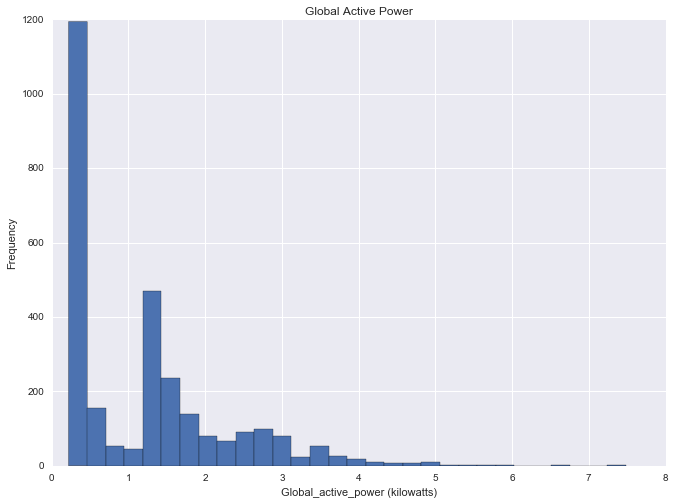

In [5]:
## plot 1: OO
fig, ax = plt.subplots()
_ = ax.hist(data['Global_active_power'],  bins=30)
_ = ax.set_xlabel('Global_active_power (kilowatts)')
_ = ax.set_ylabel('Frequency')
_ = ax.set_title('Global Active Power')

### Plot 2

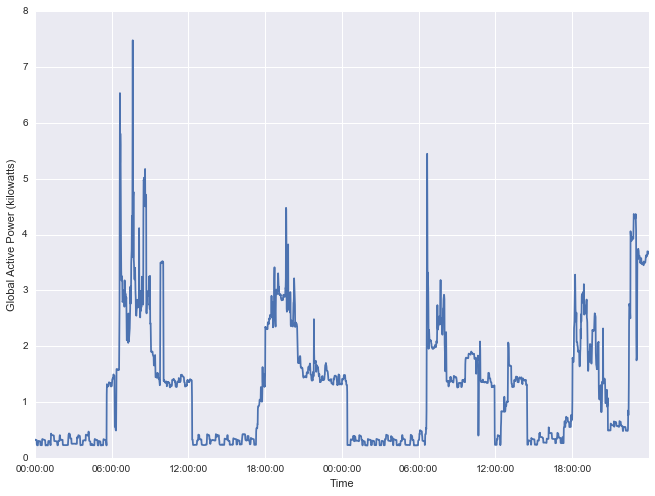

In [6]:
## plot 2: OO
fig, ax = plt.subplots()
_ = ax.plot_date(x = data.index,
                 y = data['Global_active_power'],
                 linestyle='solid',
                 marker='')
_ = ax.set_xlabel('Time')
_ = ax.set_ylabel('Global Active Power (kilowatts)')

### Plot 3

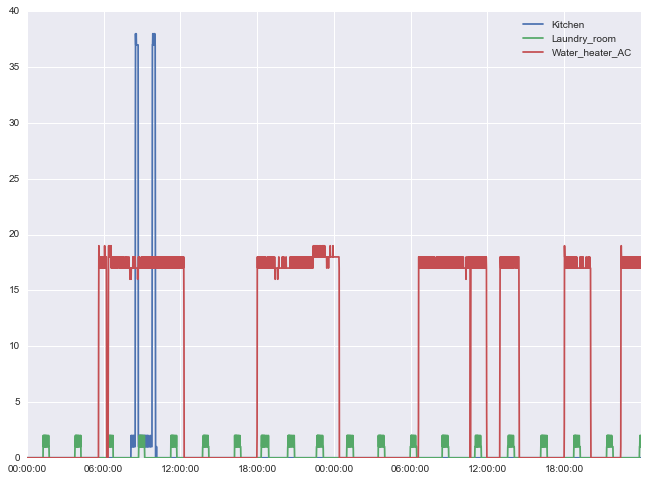

In [7]:
## plot 3: OO
fig, ax = plt.subplots()
_ = ax.plot_date(x = data.index,
                 y = data[['Kitchen', 'Laundry_room', 'Water_heater_AC']],
                 linestyle='solid',
                 marker='')
_ = ax.legend(['Kitchen', 'Laundry_room', 'Water_heater_AC'])

### Plot 4

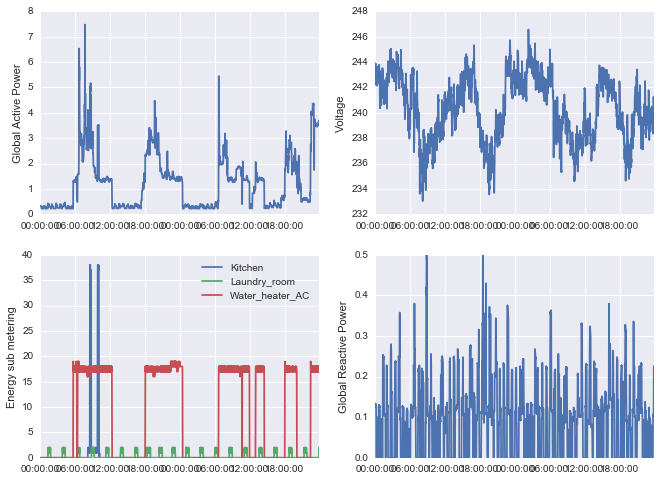

In [8]:
## plot 4: OO
fig, axes = plt.subplots(2,2)

_ = axes[0,0].plot_date(x = data.index,
                        y = data['Global_active_power'],
                        linestyle='solid',
                        marker='')
_ = axes[0,0].set_ylabel('Global Active Power')

_ = axes[0,1].plot_date(x = data.index,
                        y = data['Voltage'],
                        linestyle='solid',
                        marker='')
_ = axes[0,1].set_ylabel('Voltage')

_ = axes[1,0].plot_date(x = data.index,
                        y = data[['Kitchen', 'Laundry_room', 'Water_heater_AC']],
                        linestyle='solid',
                        marker='')
_ = axes[1,0].legend(['Kitchen', 'Laundry_room', 'Water_heater_AC'])
_ = axes[1,0].set_ylabel('Energy sub metering')

_ = axes[1,1].plot_date(x = data.index,
                        y = data['Global_reactive_power'],
                        linestyle='solid',
                        marker='')
_ = axes[1,1].set_ylabel('Global Reactive Power')

# matplotlib's pyplot module: How It Works

[Pyplot Tutorial](http://matplotlib.org/users/pyplot_tutorial.html) | [Summary of Pyplot Commands](http://matplotlib.org/api/pyplot_summary.html) | [Pyplot API](http://matplotlib.org/api/pyplot_api.html)

The matplotlib.pyplot module provides a higher level command-style interface for creating figures. Essentially, you use these functions to iteratively add the desired elements to the plot.

Pyplot uses the idea of the "current" `Figure` and `Axes`, which determines which plot the elements will be added to. Figures are manually created and/or set as the "current" figure by using `plt.figure()`, where an optional `num` argument specifies the integer identity of the figure, stored in `Figure.number`; otherwise it creates a new figure. The functions `plt.gcf()`, `plt.gca()`, and `plt.sca()` similarly "get" the current figure, "get" the current axes, and "set" the current axes.

The workhorse functions of pyplot are the plotting functions, which include `plt.plot()`, `plt.plot_date()`, `plt.hist()`, `plt.bar()`, and so on. (Note these parallel the `Axes` object methods.) Often these are called without a figure being present, in which case they create both a new `Figure` and a new `Axes` object. They return the objects actually representing the data, like a `Line2D` object in the case of `plt.plot()`. The keywords are passed to these objects anyway, so you often won't need to directly interact with them, and therefore can assign the function to "`_`" if you don't want the memory location printed. If you are creating a figure with multiple plots, then `plt.subplot()` would be called to target the given grid location, and then the plotting funtion would be called to then create the subplot.

After plotting a set of data, functions are then called to make the appropriate additions and changes to the plot. Perhaps the most common ones are `plt.xlabel()`, `plt.ylabel()`, and `plt.title()` to add axis labels and a title.

A word on style: the default colors in matplotlib are quite bland, but matplotlib allows the default color scheme to be changed. It is possible to create your own defaults, but matplotlib comes with some pre-defined styles, which can be listed using `plt.style.available` and set using `plt.style.use()`. Using `'ggplot'` is quite common, which mimics the styling of R's ggplot2 plotting package. If the `seaborn` module is imported, then it will change matplotlib's styling to that of `seaborn`, although this behavior can be suppressed.

# matplotlib's pyplot module: Histograms and Time Series

### Plot 1

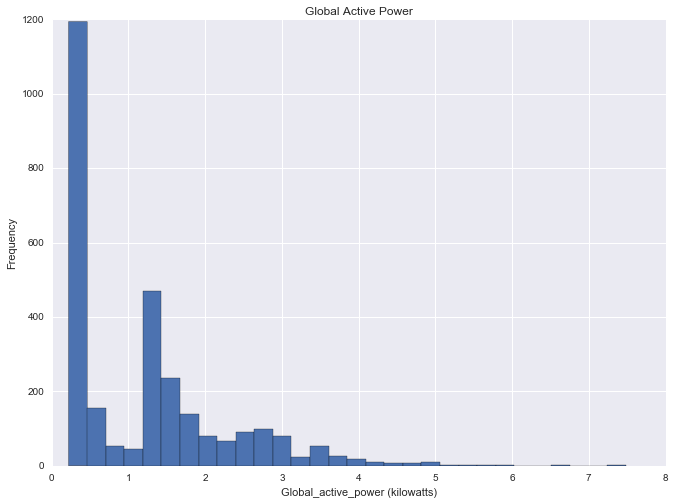

In [9]:
## plot 1: pyplot
_ = plt.hist(data['Global_active_power'],  bins=30)
_ = plt.xlabel('Global_active_power (kilowatts)')
_ = plt.ylabel('Frequency')
_ = plt.title('Global Active Power')

### Plot 2

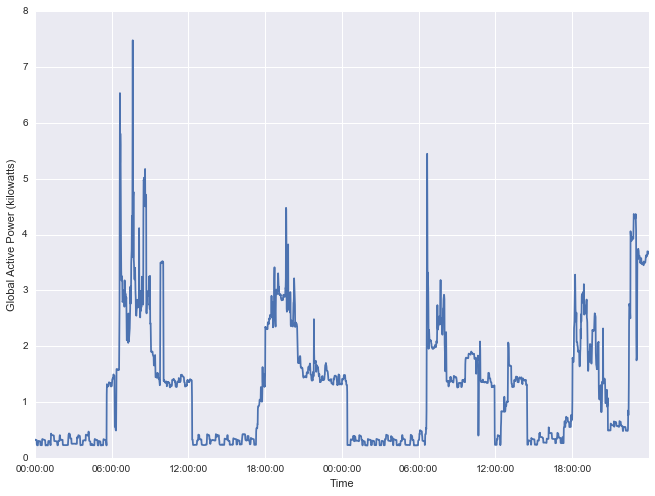

In [10]:
## plot 2: pyplot
_ = plt.plot_date(x = data.index,
                  y = data['Global_active_power'],
                  linestyle='solid',
                  marker='')
_ = plt.xlabel('Time')
_ = plt.ylabel('Global Active Power (kilowatts)')

### Plot 3

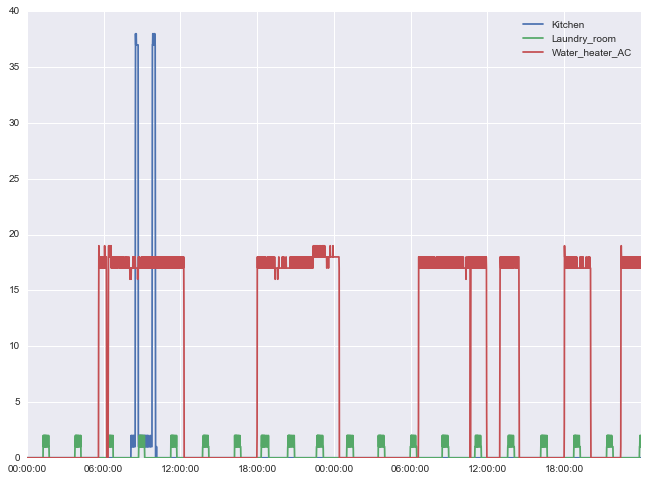

In [11]:
## plot 3: pyplot
_ = plt.plot_date(x = data.index,
              y = data[['Kitchen', 'Laundry_room', 'Water_heater_AC']],
              linestyle='solid',
              marker='')
_ = plt.legend(['Kitchen', 'Laundry_room', 'Water_heater_AC'])

### Plot 4

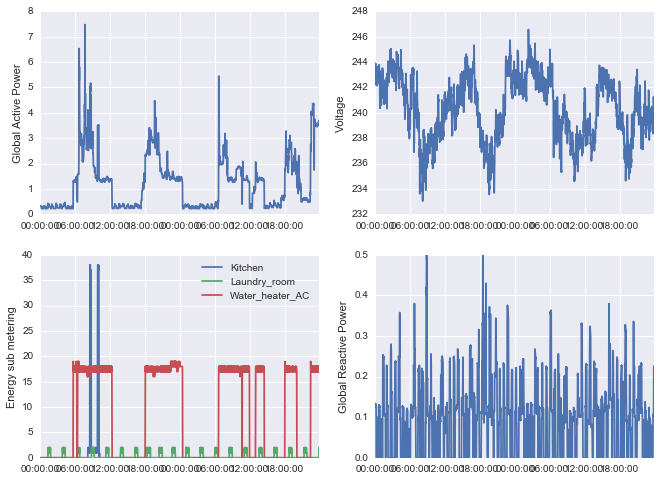

In [12]:
## plot 4: pyplot
_ = plt.subplot(221)
_ = plt.plot_date(x = data.index,
                  y = data['Global_active_power'],
                  linestyle='solid',
                  marker='')
_ = plt.ylabel('Global Active Power')

_ = plt.subplot(222)
_ = plt.plot_date(x = data.index,
             y = data['Voltage'],
             linestyle='solid',
             marker='')
_ = plt.ylabel('Voltage')

_ = plt.subplot(223)
_ = plt.plot_date(x = data.index,
              y = data[['Kitchen', 'Laundry_room', 'Water_heater_AC']],
              linestyle='solid',
              marker='')
_ = plt.legend(['Kitchen', 'Laundry_room', 'Water_heater_AC'])
_ = plt.ylabel('Energy sub metering')

_ = plt.subplot(224)
_ = plt.plot_date(x = data.index,
             y = data['Global_reactive_power'],
             linestyle='solid',
             marker='')
_ = plt.ylabel('Global Reactive Power')

# Plotting with pandas: How It Works

[pandas Visualization](http://pandas.pydata.org/pandas-docs/stable/visualization.html) | [DataFrame.plot()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html)

pandas objects have a `plot` method that provides a convenient wrapper of pyplot's `plt.plot()` function. Many of the other common pyplot plotting functions, like `plt.hist()` and `plt.bar()`, have equivalents like `df.plot.hist()` and `df.plot.bar()`, which also can be accessed by using the `kind` argument to `plot()`, like `df.plot(kind='hist')`. For convenience, legends and axis titles are created automatically when possible. Furthermore, the `plot()` method also contains many useful arguments, such as `figsize`, that can be used instead of accessing the underlying matplotlib objects.  Also, these methods return the matplotlib `Axes` object, rather than the objects representing the data, providing a direct route to customizing the plot using the `Axes` methods. Together, these perhaps make pandas the most efficient way to create many simple plots.

The `pandas.tools.plotting` module contains functions for making more specialized data analysis plots, like scatter matrix plots and bootstrap plots.

# Plotting with pandas: Histograms and Time Series

### Plot 1

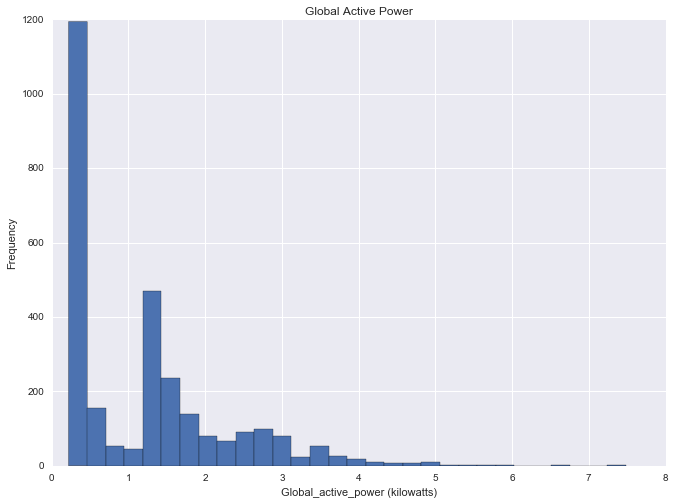

In [13]:
## plot 1: pandas
ax = data.Global_active_power.plot.hist(bins=30,
                                        title='Global Active Power')
_ = ax.set_xlabel('Global_active_power (kilowatts)')

### Plot 2

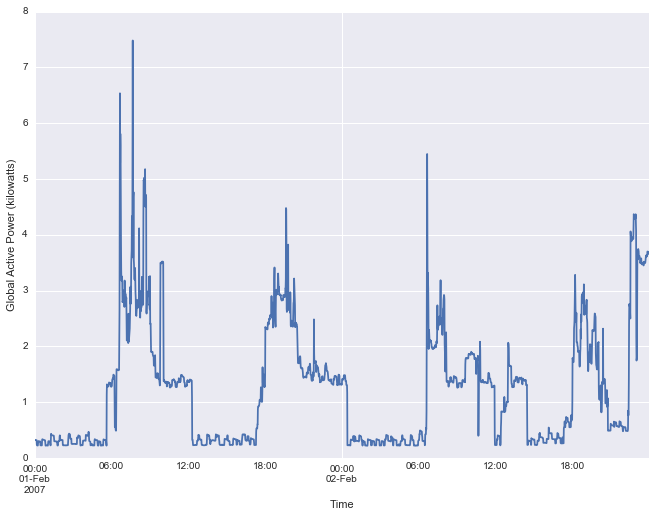

In [14]:
## plot 2: pandas
_ = data['Global_active_power'].plot()
_ = plt.ylabel('Global Active Power (kilowatts)')

### Plot 3

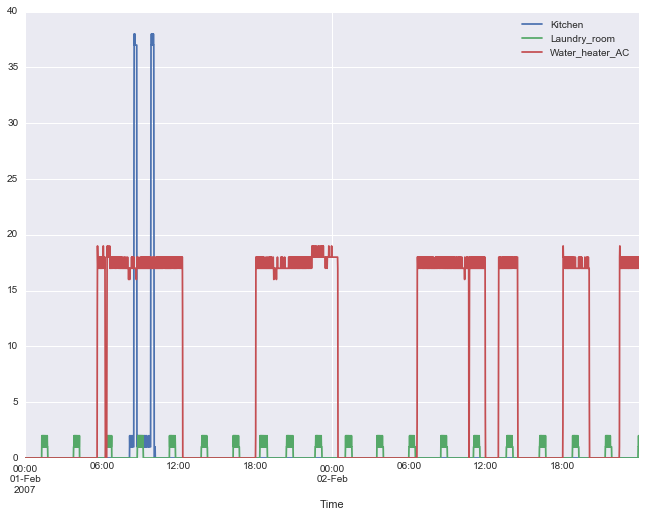

In [15]:
## plot 3: pandas
_ = data[['Kitchen', 'Laundry_room', 'Water_heater_AC']].plot()

### Plot 4

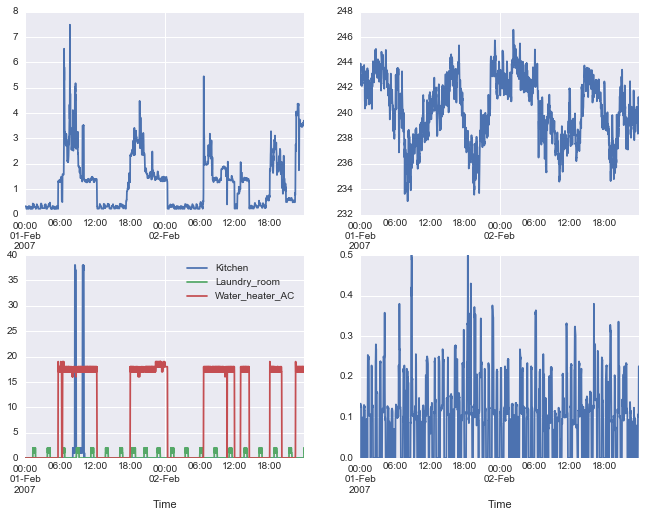

In [16]:
## plot 4: pandas
fig, axes = plt.subplots(2,2)

_ = data['Global_active_power'].plot(ax=axes[0,0])
_ = data['Voltage'].plot(ax=axes[0,1])
_ = data[['Kitchen', 'Laundry_room', 'Water_heater_AC']].plot(ax=axes[1,0])
_ = data['Global_reactive_power'].plot(ax=axes[1,1])

# seaborn: How It Works

[Seaborn tutorial](http://stanford.edu/~mwaskom/software/seaborn/tutorial.html) | [Seaborn API](http://stanford.edu/~mwaskom/software/seaborn/api.html)

Admittedly, I am very new to seaborn and lack an deep understanding of how it works. It is a high level plotting system built on top of matplotlib that seems to be geared toward making more complex statistical plots. They are visually attractive, informative, and easy to make. For example, the histogram function (used below) by default adds a density estimate. I suspect this to be a recurring theme: by default adding statistical information or modeling when possible to help visualize patterns. There also seems to be extensive capabilities for customizing styling and color palettes. And since it is built on top of matplotlib, the plots can be customized in identical ways. At this point I haven't used it enough to know what it's most useful features are, or what the common usage patterns are, so I would look at the API reference and see if there is a function for making your desired plot.

I did find the timeseries plotting function to be quite buggy, although I don't think this is representative of the whole packge. It was very finnicky about how the data was inputted and what arguments were given, and was converting and plotting the dates as integers representing *nanoseconds* since 01/01/01, which were large enough numbers to thwart my initial attempts to convert them to regular dates. I eventually wrote a short function making use of matplotlib's tick formatting and locating objects that when called would fix the plot *almost* completely. I also had to append a single extra row.

Seaborn is usually imported using "`import seaborn as sns`".


# seaborn: Histograms and Time Series

### Plot 1

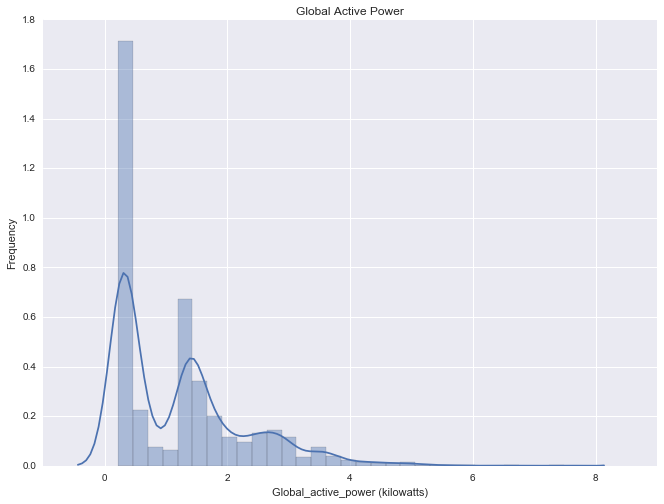

In [17]:
## plot 1: seaborn
ax = sns.distplot(data['Global_active_power'],
                  bins=30)
_ = ax.set_xlabel('Global_active_power (kilowatts)')
_ = ax.set_ylabel('Frequency')
_ = ax.set_title('Global Active Power')

### Plot 2

In [18]:
## Define function to fix the x axis of the seaborn plots

def fmt_seaborn(fig=None, ax=None):
    if fig is None:
        fig = plt.gcf()
    if ax is None:
        ax = plt.gca()
        
    from matplotlib.ticker import LinearLocator, FuncFormatter
    
    # Locate ticks at nearly correct positions
    ax.xaxis.set_major_locator(LinearLocator(numticks=9))
    
    # Format tick labels
    def int_to_string(dt, pos=None):
        return pd.to_datetime(dt, unit='ns').strftime('%H:%M:%S')
    formatter = FuncFormatter(func=int_to_string)
    ax.xaxis.set_major_formatter(formatter)
    
    # Auto-adjust xlabels so they are easily readable
    fig.autofmt_xdate()

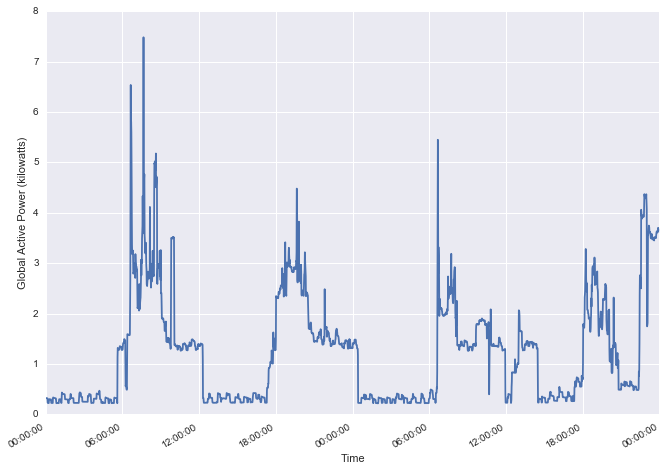

In [19]:
## plot 2: seaborn
fig, ax = plt.subplots()
sns.tsplot(data=data.append(row)['Global_active_power'],
           #value='Global_active_power',
           time=data.append(row).index,
           ax=ax)
fmt_seaborn()
_ = plt.ylabel('Global Active Power (kilowatts)')

### Plot 3

Both seaborn and ggplot required the data to be in "long" format for making plot 3.

In [20]:
df = data.append(row)[['Kitchen', 'Laundry_room', 'Water_heater_AC']].stack().reset_index()
df.columns = ['Time', 'Variable', 'Value']
df.head(12)

,Time,Variable,Value
0,2007-02-01 00:00:00,Kitchen,0
1,2007-02-01 00:00:00,Laundry_room,0
2,2007-02-01 00:00:00,Water_heater_AC,0
3,2007-02-01 00:01:00,Kitchen,0
4,2007-02-01 00:01:00,Laundry_room,0
5,2007-02-01 00:01:00,Water_heater_AC,0
6,2007-02-01 00:02:00,Kitchen,0
7,2007-02-01 00:02:00,Laundry_room,0
8,2007-02-01 00:02:00,Water_heater_AC,0
9,2007-02-01 00:03:00,Kitchen,0


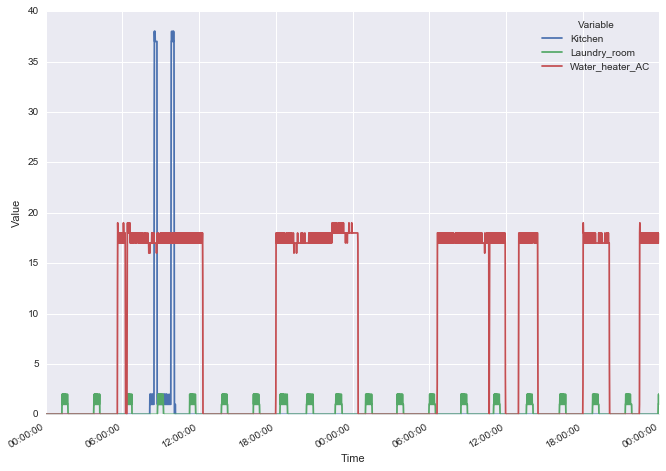

In [21]:
## plot 3: seaborn
fig, ax = plt.subplots()
df['_Dummy'] = '_'
sns.tsplot(data=df,
           time='Time',
           value='Value',
           condition='Variable',
           unit='_Dummy',
           ax=ax)
fmt_seaborn()

### Plot 4

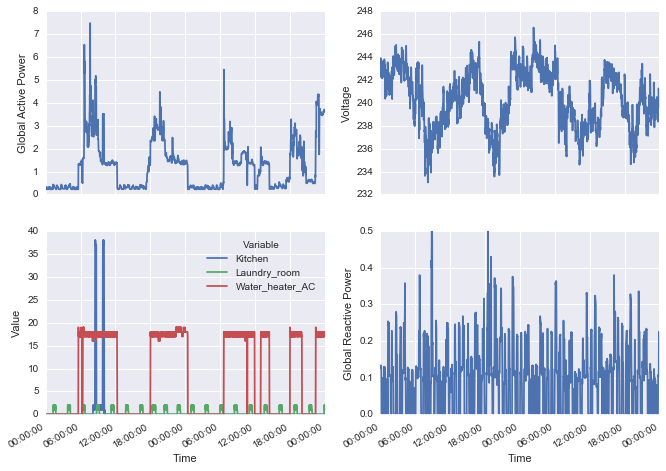

In [29]:
## plot 4: seaborn
fig, axes = plt.subplots(2,2)

sns.tsplot(data=data.append(row)['Global_active_power'],
           time=data.append(row).index,
           ax=axes[0,0])
_ = axes[0,0].set_ylabel('Global Active Power')
fmt_seaborn(fig, axes[0,0])

sns.tsplot(data=data.append(row)['Voltage'],
           time=data.append(row).index,
           ax=axes[0,1])
_ = axes[0,1].set_ylabel('Voltage')
fmt_seaborn(fig, axes[0,1])

sns.tsplot(data=df,
           time='Time',
           value='Value',
           condition='Variable',
           unit='_Dummy',
           ax=axes[1,0])
fmt_seaborn(fig, axes[1,0])

sns.tsplot(data=data.append(row)['Global_reactive_power'],
           time=data.append(row).index,
           ax=axes[1,1])
_ = axes[1,1].set_ylabel('Global Reactive Power')
fmt_seaborn(fig, axes[1,1])
plt.show()

# ggplot: How It Works

[Documentation](http://ggplot.yhathq.com/docs/index.html) | [GitHub](https://github.com/yhat/ggplot) | [Rewrite GitHub](https://github.com/has2k1/ggplot) | [Documentation for R package](http://docs.ggplot2.org/current/)


ggplot2 is an extremely popular plotting package in R that implements Leland Wilkinson's "Grammar of Graphics", which is essentially a theory of how a plot and the underlying data should be related. And ggplot is known for making very beautiful plots right out of the box. It can be accessed in Python in two main ways. The first is using an R porting library such as rpy2 to run R code in Python. I haven't tried this one yet. Alternatively, yhat has led an open-source project to create a native Python implementation. It is still very young, not yet capable of certain things (for example I couldn't create a grid of unrelated plots), and perhaps a bit buggy, but on the simple tasks I have tried with it, it seems to work pretty well.

A major rewrite is currently underway that may bring the Python implementation's capabilities much closer to that in R, the third link above. As of this writing, the rewrite is currently 242 commits ahead of the main repository, which looks like it has stalled. See [here](https://github.com/has2k1/ggplot/graphs/contributors) versus [here](https://github.com/yhat/ggplot/graphs/contributors).

The central idea of ggplot and the "Grammar of Graphics" is that specific aspects of the data (usually variables/columns) should correspond to specific aspects of the plot, usually x-values, y-values, or color. This mapping is called a set of "aesthetics". Then, "layers" are added to the plot that make use of the aesthetics to represent the data. These are your lines, markers, bars, and so on, and are sometimes refered to as "geoms". These are all combined using "+" operators.

Basic usage goes like:

`from ggplot import *`

`g1 = ggplot(data, aes(x = 'Column_1', y = 'Column_2', color = 'Column_3')) + geom_line()`


The ggplot function takes a `data` argument and an `aesthetics` argument, where the latter is given using the `aes()` function, mapping plot elements to column names. Then one or more layers are added to the plot that will use the aesthetics to plot the data. These are the `geom_` type functions. Functions like `xlab()` and `ylab()` can then be added to add or change axis labels.

The best way to currently use the Python implementation is to look at the documentation page and find the plot you want to create.

For now, I would not use the Python implementation of ggplot as your main plotting system for 3 reasons.
1. The first is that the documentation is very underdeveloped, and it is not clear what functionality has or has not yet been brought over from R. This makes it difficult to learn and navigate, and may make for unexpected surprises.
2. The second is that it is sometimes buggy or unnaturally inflexible. For example, it appears that the aesthetic mapping provided by `aes()` is currently not allowed to be placed directly within the `geom_()` functions, meaning they cannot have differing aesthetics. Also, you currently can't pass multiple column names as aesthetics. So to plot multiple lines, you can't set `y = ['Column_1', 'Column_2', ...]`, but rather must convert to a "long" data format and set `y = 'Value', color = 'Variable'`. Setting aesthetics to `data.index` sometimes works, but othertimes does not. 
3. Thirdly, it is not built on matplotlib, so you can't fall back on it when you need to.

If you strongly prefer ggplot, learning how to use an R-porting library like rpy2 will probably be necessary for the time being. 

# ggplot: Histograms and Time Series

### Plot 1

stat_bin: binwidth defaulted to range/30.
    Use 'binwidth = x' to adjust this.


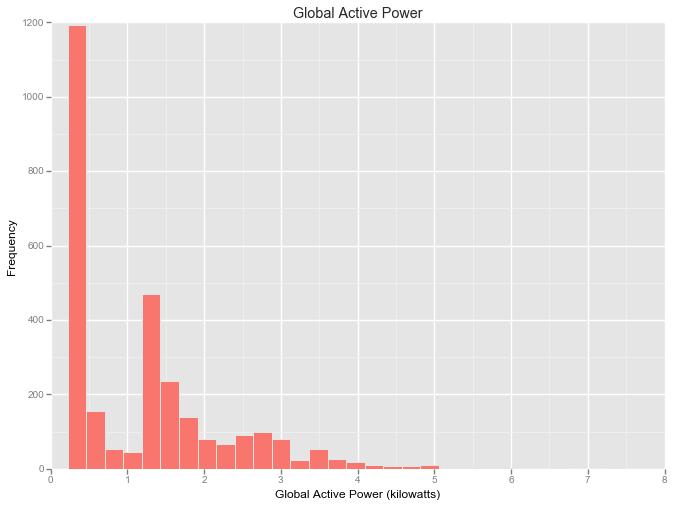

<ggplot: (-9223372036574558411)>

In [23]:
## plot 1: ggplot
g1 = (ggplot(data, aes(x='Global_active_power'))
      + geom_histogram(fill = "#F8766D")
      + labs(x='Global Active Power (kilowatts)',
             y='Frequency',
             title='Global Active Power'))
g1

### Plot 2

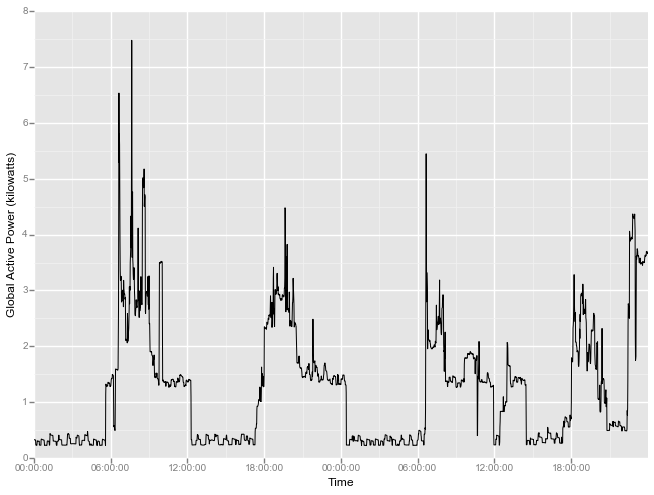

<ggplot: (280250551)>

In [24]:
## plot 2: ggplot
g2 = (ggplot(data, aes(x = data.index, y = 'Global_active_power'))
      + geom_line()
      + xlab('Time')
      + ylab('Global Active Power (kilowatts)'))
g2

### Plot 3

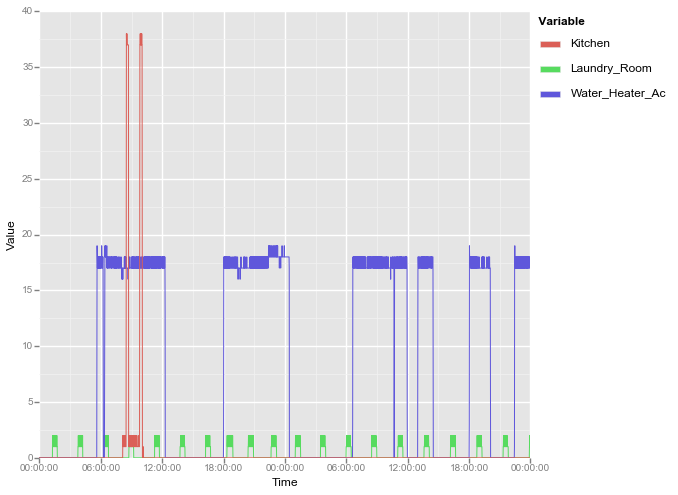

<ggplot: (279340878)>

In [25]:
## plot 3: ggplot
g4 = (ggplot(df, aes(x='Time', y='Value', color='Variable')) + geom_line())
g4

### Plot 4

In [26]:
## plot 4: ggplot; "grid.arrange" currently not implemented in Python

# g2 = (ggplot(data, aes(x = data.index, y = 'Global_active_power'))
#       + geom_line()
#       + xlab('')
#       + ylab('Global Active Power (kilowatts)'))

# grid.arrange(g5, g6, g7, g8, ncol=2, nrow=2)